In [81]:
%pylab inline
import pandas as pd
import seaborn
import plotly.graph_objects as go
from datetime import datetime as dt
from sklearn.linear_model import LinearRegression    
import numpy as np   
import matplotlib.pyplot as plt  
from matplotlib import style
import matplotlib.dates as mdates
style.use('ggplot')

Populating the interactive namespace from numpy and matplotlib


/Users/enakshi/opt/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning:

pylab import has clobbered these variables: ['datetime']
`%matplotlib` prevents importing * from pylab and numpy



In [178]:
data = pd.read_csv('CleanData.csv', encoding = "ISO-8859-1")

In [179]:
data.head(10)

,Basket_ID,Date,Weekday,Barcode,Sum_Units,Sum_Value,Card_ID,Age,Gender,MaritalStatus,...,CategoryA,CategoryB,CategoryC,CategoryD,CategoryBDescription,CategoryCDescription,A+B+C+D,CategoryDDescription,Unnamed: 20,Unnamed: 21
0,1103084867,15/04/2013,Monday,8.000000e+11,2,1.960000,9.160000e+12,54.0,Female,Married,...,10.0,14.0,239.0,2.0,Grocery Food,pet,10142392.0,cat,NaN,NaN
1,1103853519,17/04/2013,Wednesday,5.200000e+11,1,5.349993,9.160000e+12,52.0,Unknown,0,...,10.0,12.0,281.0,1.0,Detergents,laundry,10122811.0,wash,NaN,NaN
2,1092750793,13/03/2013,Wednesday,5.200000e+11,6,1.740015,9.160000e+12,NaN,Female,0,...,10.0,14.0,239.0,2.0,Grocery Food,pet,10142392.0,cat,NaN,NaN
3,1106160983,24/04/2013,Wednesday,2.110000e+11,1,0.749817,9.160000e+12,72.0,Female,0,...,20.0,56.0,183.0,9.0,fruits and vegetables,fresh vegetables,20561839.0,OTHER VEGETABLES,NaN,NaN
4,1108695491,01/05/2013,Wednesday,5.200000e+11,2,0.600000,9.160000e+12,51.0,Female,0,...,40.0,31.0,316.0,1.0,household,"cleaning tools, gloves and fragrance",40313161.0,gloves,NaN,NaN
5,1089674734,04/03/2013,Monday,2.130000e+11,1,3.808804,9.160000e+12,35.0,Female,0,...,20.0,51.0,110.0,1.0,DAIRY PRODUCTS,cheese (counter),20511101.0,feta,NaN,feta
6,1100327962,06/04/2013,Saturday,8.716266e+06,1,0.740015,9.160000e+12,NaN,0,0,...,10.0,14.0,216.0,2.0,Grocery Food,condensed milk,10142162.0,no sugar,NaN,NaN
7,1105798474,23/04/2013,Tuesday,2.110000e+11,1,1.560235,9.160000e+12,41.0,Female,Single (Alone),...,20.0,56.0,183.0,5.0,fruits and vegetables,fresh vegetables,20561835.0,TOMATOES,NaN,NaN
8,1104570471,19/04/2013,Friday,5.200000e+11,1,0.880000,9.160000e+12,62.0,Male,NaN,...,20.0,54.0,164.0,2.0,bakery,croissants,20541642.0,pastries,NaN,NaN
9,1095466893,22/03/2013,Friday,5.200000e+11,1,1.460015,NaN,NaN,NaN,0,...,10.0,14.0,229.0,2.0,Grocery Food,crisps,10142292.0,oregano,NaN,NaN


In [180]:
#to delete rows having Sum_Value less than or equal to zero
indexNames = data[ data['Sum_Value'] <= 0 ].index
indexNames
data.drop(indexNames , inplace=True)
data.head(10)

,Basket_ID,Date,Weekday,Barcode,Sum_Units,Sum_Value,Card_ID,Age,Gender,MaritalStatus,...,CategoryA,CategoryB,CategoryC,CategoryD,CategoryBDescription,CategoryCDescription,A+B+C+D,CategoryDDescription,Unnamed: 20,Unnamed: 21
0,1103084867,15/04/2013,Monday,8.000000e+11,2,1.960000,9.160000e+12,54.0,Female,Married,...,10.0,14.0,239.0,2.0,Grocery Food,pet,10142392.0,cat,NaN,NaN
1,1103853519,17/04/2013,Wednesday,5.200000e+11,1,5.349993,9.160000e+12,52.0,Unknown,0,...,10.0,12.0,281.0,1.0,Detergents,laundry,10122811.0,wash,NaN,NaN
2,1092750793,13/03/2013,Wednesday,5.200000e+11,6,1.740015,9.160000e+12,NaN,Female,0,...,10.0,14.0,239.0,2.0,Grocery Food,pet,10142392.0,cat,NaN,NaN
3,1106160983,24/04/2013,Wednesday,2.110000e+11,1,0.749817,9.160000e+12,72.0,Female,0,...,20.0,56.0,183.0,9.0,fruits and vegetables,fresh vegetables,20561839.0,OTHER VEGETABLES,NaN,NaN
4,1108695491,01/05/2013,Wednesday,5.200000e+11,2,0.600000,9.160000e+12,51.0,Female,0,...,40.0,31.0,316.0,1.0,household,"cleaning tools, gloves and fragrance",40313161.0,gloves,NaN,NaN
5,1089674734,04/03/2013,Monday,2.130000e+11,1,3.808804,9.160000e+12,35.0,Female,0,...,20.0,51.0,110.0,1.0,DAIRY PRODUCTS,cheese (counter),20511101.0,feta,NaN,feta
6,1100327962,06/04/2013,Saturday,8.716266e+06,1,0.740015,9.160000e+12,NaN,0,0,...,10.0,14.0,216.0,2.0,Grocery Food,condensed milk,10142162.0,no sugar,NaN,NaN
7,1105798474,23/04/2013,Tuesday,2.110000e+11,1,1.560235,9.160000e+12,41.0,Female,Single (Alone),...,20.0,56.0,183.0,5.0,fruits and vegetables,fresh vegetables,20561835.0,TOMATOES,NaN,NaN
8,1104570471,19/04/2013,Friday,5.200000e+11,1,0.880000,9.160000e+12,62.0,Male,NaN,...,20.0,54.0,164.0,2.0,bakery,croissants,20541642.0,pastries,NaN,NaN
9,1095466893,22/03/2013,Friday,5.200000e+11,1,1.460015,NaN,NaN,NaN,0,...,10.0,14.0,229.0,2.0,Grocery Food,crisps,10142292.0,oregano,NaN,NaN


In [181]:
#to delete rows having Sum_Units less than or equal to zero
indexNames = data[ data['Sum_Units'] <= 0 ].index
indexNames
data.drop(indexNames , inplace=True)
data.head(10)

,Basket_ID,Date,Weekday,Barcode,Sum_Units,Sum_Value,Card_ID,Age,Gender,MaritalStatus,...,CategoryA,CategoryB,CategoryC,CategoryD,CategoryBDescription,CategoryCDescription,A+B+C+D,CategoryDDescription,Unnamed: 20,Unnamed: 21
0,1103084867,15/04/2013,Monday,8.000000e+11,2,1.960000,9.160000e+12,54.0,Female,Married,...,10.0,14.0,239.0,2.0,Grocery Food,pet,10142392.0,cat,NaN,NaN
1,1103853519,17/04/2013,Wednesday,5.200000e+11,1,5.349993,9.160000e+12,52.0,Unknown,0,...,10.0,12.0,281.0,1.0,Detergents,laundry,10122811.0,wash,NaN,NaN
2,1092750793,13/03/2013,Wednesday,5.200000e+11,6,1.740015,9.160000e+12,NaN,Female,0,...,10.0,14.0,239.0,2.0,Grocery Food,pet,10142392.0,cat,NaN,NaN
3,1106160983,24/04/2013,Wednesday,2.110000e+11,1,0.749817,9.160000e+12,72.0,Female,0,...,20.0,56.0,183.0,9.0,fruits and vegetables,fresh vegetables,20561839.0,OTHER VEGETABLES,NaN,NaN
4,1108695491,01/05/2013,Wednesday,5.200000e+11,2,0.600000,9.160000e+12,51.0,Female,0,...,40.0,31.0,316.0,1.0,household,"cleaning tools, gloves and fragrance",40313161.0,gloves,NaN,NaN
5,1089674734,04/03/2013,Monday,2.130000e+11,1,3.808804,9.160000e+12,35.0,Female,0,...,20.0,51.0,110.0,1.0,DAIRY PRODUCTS,cheese (counter),20511101.0,feta,NaN,feta
6,1100327962,06/04/2013,Saturday,8.716266e+06,1,0.740015,9.160000e+12,NaN,0,0,...,10.0,14.0,216.0,2.0,Grocery Food,condensed milk,10142162.0,no sugar,NaN,NaN
7,1105798474,23/04/2013,Tuesday,2.110000e+11,1,1.560235,9.160000e+12,41.0,Female,Single (Alone),...,20.0,56.0,183.0,5.0,fruits and vegetables,fresh vegetables,20561835.0,TOMATOES,NaN,NaN
8,1104570471,19/04/2013,Friday,5.200000e+11,1,0.880000,9.160000e+12,62.0,Male,NaN,...,20.0,54.0,164.0,2.0,bakery,croissants,20541642.0,pastries,NaN,NaN
9,1095466893,22/03/2013,Friday,5.200000e+11,1,1.460015,NaN,NaN,NaN,0,...,10.0,14.0,229.0,2.0,Grocery Food,crisps,10142292.0,oregano,NaN,NaN


In [182]:
#to delete rows having barcode less than 12 digits
indexNames = data[data['Barcode'] <= 99999999999].index
indexNames
data.drop(indexNames , inplace=True)
data.head(10)

,Basket_ID,Date,Weekday,Barcode,Sum_Units,Sum_Value,Card_ID,Age,Gender,MaritalStatus,...,CategoryA,CategoryB,CategoryC,CategoryD,CategoryBDescription,CategoryCDescription,A+B+C+D,CategoryDDescription,Unnamed: 20,Unnamed: 21
0,1103084867,15/04/2013,Monday,8.000000e+11,2,1.960000,9.160000e+12,54.0,Female,Married,...,10.0,14.0,239.0,2.0,Grocery Food,pet,10142392.0,cat,NaN,NaN
1,1103853519,17/04/2013,Wednesday,5.200000e+11,1,5.349993,9.160000e+12,52.0,Unknown,0,...,10.0,12.0,281.0,1.0,Detergents,laundry,10122811.0,wash,NaN,NaN
2,1092750793,13/03/2013,Wednesday,5.200000e+11,6,1.740015,9.160000e+12,NaN,Female,0,...,10.0,14.0,239.0,2.0,Grocery Food,pet,10142392.0,cat,NaN,NaN
3,1106160983,24/04/2013,Wednesday,2.110000e+11,1,0.749817,9.160000e+12,72.0,Female,0,...,20.0,56.0,183.0,9.0,fruits and vegetables,fresh vegetables,20561839.0,OTHER VEGETABLES,NaN,NaN
4,1108695491,01/05/2013,Wednesday,5.200000e+11,2,0.600000,9.160000e+12,51.0,Female,0,...,40.0,31.0,316.0,1.0,household,"cleaning tools, gloves and fragrance",40313161.0,gloves,NaN,NaN
5,1089674734,04/03/2013,Monday,2.130000e+11,1,3.808804,9.160000e+12,35.0,Female,0,...,20.0,51.0,110.0,1.0,DAIRY PRODUCTS,cheese (counter),20511101.0,feta,NaN,feta
7,1105798474,23/04/2013,Tuesday,2.110000e+11,1,1.560235,9.160000e+12,41.0,Female,Single (Alone),...,20.0,56.0,183.0,5.0,fruits and vegetables,fresh vegetables,20561835.0,TOMATOES,NaN,NaN
8,1104570471,19/04/2013,Friday,5.200000e+11,1,0.880000,9.160000e+12,62.0,Male,NaN,...,20.0,54.0,164.0,2.0,bakery,croissants,20541642.0,pastries,NaN,NaN
9,1095466893,22/03/2013,Friday,5.200000e+11,1,1.460015,NaN,NaN,NaN,0,...,10.0,14.0,229.0,2.0,Grocery Food,crisps,10142292.0,oregano,NaN,NaN
10,1097560314,29/03/2013,Friday,5.200000e+11,1,2.389993,9.160000e+12,67.0,Female,0,...,10.0,12.0,287.0,1.0,Detergents,hair care,10122871.0,styling products,NaN,NaN


In [183]:
#to replace NA in Card_ID with "Cash"
data["Card_ID"].fillna("Cash", inplace = True)
data.head(10)

,Basket_ID,Date,Weekday,Barcode,Sum_Units,Sum_Value,Card_ID,Age,Gender,MaritalStatus,...,CategoryA,CategoryB,CategoryC,CategoryD,CategoryBDescription,CategoryCDescription,A+B+C+D,CategoryDDescription,Unnamed: 20,Unnamed: 21
0,1103084867,15/04/2013,Monday,8.000000e+11,2,1.960000,9.16e+12,54.0,Female,Married,...,10.0,14.0,239.0,2.0,Grocery Food,pet,10142392.0,cat,NaN,NaN
1,1103853519,17/04/2013,Wednesday,5.200000e+11,1,5.349993,9.16e+12,52.0,Unknown,0,...,10.0,12.0,281.0,1.0,Detergents,laundry,10122811.0,wash,NaN,NaN
2,1092750793,13/03/2013,Wednesday,5.200000e+11,6,1.740015,9.16e+12,NaN,Female,0,...,10.0,14.0,239.0,2.0,Grocery Food,pet,10142392.0,cat,NaN,NaN
3,1106160983,24/04/2013,Wednesday,2.110000e+11,1,0.749817,9.16e+12,72.0,Female,0,...,20.0,56.0,183.0,9.0,fruits and vegetables,fresh vegetables,20561839.0,OTHER VEGETABLES,NaN,NaN
4,1108695491,01/05/2013,Wednesday,5.200000e+11,2,0.600000,9.16e+12,51.0,Female,0,...,40.0,31.0,316.0,1.0,household,"cleaning tools, gloves and fragrance",40313161.0,gloves,NaN,NaN
5,1089674734,04/03/2013,Monday,2.130000e+11,1,3.808804,9.16e+12,35.0,Female,0,...,20.0,51.0,110.0,1.0,DAIRY PRODUCTS,cheese (counter),20511101.0,feta,NaN,feta
7,1105798474,23/04/2013,Tuesday,2.110000e+11,1,1.560235,9.16e+12,41.0,Female,Single (Alone),...,20.0,56.0,183.0,5.0,fruits and vegetables,fresh vegetables,20561835.0,TOMATOES,NaN,NaN
8,1104570471,19/04/2013,Friday,5.200000e+11,1,0.880000,9.16e+12,62.0,Male,NaN,...,20.0,54.0,164.0,2.0,bakery,croissants,20541642.0,pastries,NaN,NaN
9,1095466893,22/03/2013,Friday,5.200000e+11,1,1.460015,Cash,NaN,NaN,0,...,10.0,14.0,229.0,2.0,Grocery Food,crisps,10142292.0,oregano,NaN,NaN
10,1097560314,29/03/2013,Friday,5.200000e+11,1,2.389993,9.16e+12,67.0,Female,0,...,10.0,12.0,287.0,1.0,Detergents,hair care,10122871.0,styling products,NaN,NaN


In [184]:
data.shape

(224889, 22)

In [177]:
indexNames = data[data['Age'] >= 120].index
indexNames
data.drop(indexNames , inplace=True)
data.head(10)
data.shape

/Users/enakshi/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



(0, 22)

In [134]:
#data.to_csv("data.csv")

In [185]:
maxSaleDay=data[(data['Weekday'] == 'Monday')]
maxSaleDay.Sum_Units.sum(skipna = True) 

44915

In [186]:
maxSaleDay=data[(data['Weekday'] == 'Tuesday')]
maxSaleDay.Sum_Units.sum(skipna = True) 

44709

In [187]:
#maxSaleDay.shape

In [188]:
maxSaleDay=data[(data['Weekday'] == 'Wednesday')]
maxSaleDay.Sum_Units.sum(skipna = True)

41891

In [189]:
maxSaleDay=data[(data['Weekday'] == 'Thursday')]
maxSaleDay.Sum_Units.sum(skipna = True)

48436

In [190]:
maxSaleDay=data[(data['Weekday'] == 'Friday')]
maxSaleDay.Sum_Units.sum(skipna = True)

46923

In [191]:
maxSaleDay=data[(data['Weekday'] == 'Saturday')]
x = maxSaleDay.Sum_Units.sum(skipna = True)
x

57439

(array([34297., 33532., 34696., 37526., 46251., 38587.,     0.]),
 array([-0.4       ,  0.51428571,  1.42857143,  2.34285714,  3.25714286,
         4.17142857,  5.08571429,  6.        ]),
 <a list of 7 Patch objects>)

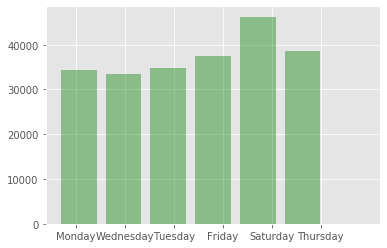

In [218]:
hist(data.Weekday, bins=7, range =(-.4,6), rwidth=.8, color='green', alpha=.4)

In [253]:
data['CategoryDDescription']

0                        cat 
1                        wash
2                        cat 
3            OTHER VEGETABLES
4                      gloves
                 ...         
235469                 ORANGE
235470               crumpets
235471    ONMS - Dried garlic
235472       LIMITED DURATION
235473             dishwasher
Name: CategoryDDescription, Length: 224889, dtype: object

In [249]:
#y=data.CategoryDDescription.unique

(array([8.1715e+04, 5.7580e+03, 3.7679e+04, 1.7235e+04, 6.5000e+01,
        0.0000e+00, 0.0000e+00]),
 array([-0.4       ,  0.51428571,  1.42857143,  2.34285714,  3.25714286,
         4.17142857,  5.08571429,  6.        ]),
 <a list of 7 Patch objects>)

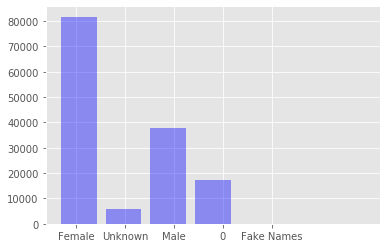

In [259]:
hist(data.Gender, bins=7, range =(-.4,6), rwidth=.8, color='blue', alpha=.4)